#David Ballester

##Practice Activity 2.1

## Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_passengers = df_titanic[df_titanic["type"] == "passenger"]
df_passengers

cross_tab = pd.crosstab(df_passengers["class"], df_passengers["embarked"])
cross_tab



embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
conditional_distribution_class_given_embarked = cross_tab.apply(lambda x: x / x.sum(), axis=0)
display(conditional_distribution_class_given_embarked)

conditional_distribution_embarked_given_class = cross_tab.apply(lambda x: x / x.sum(), axis=1)
display(conditional_distribution_embarked_given_class)

proportion_3rd_class_embarked_at_Southampton = conditional_distribution_class_given_embarked.loc["3rd", "S"]
display(proportion_3rd_class_embarked_at_Southampton)
#0.540481

#proportion_Southampton_passengers_in_3rd_class = conditional_distribution_embarked_given_class.loc["S", 3]
#display(proportion_Southampton_passengers_in_3rd_class)
#0.696756


embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


np.float64(0.5404814004376368)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [ ]:
from plotnine import ggplot, aes, geom_bar

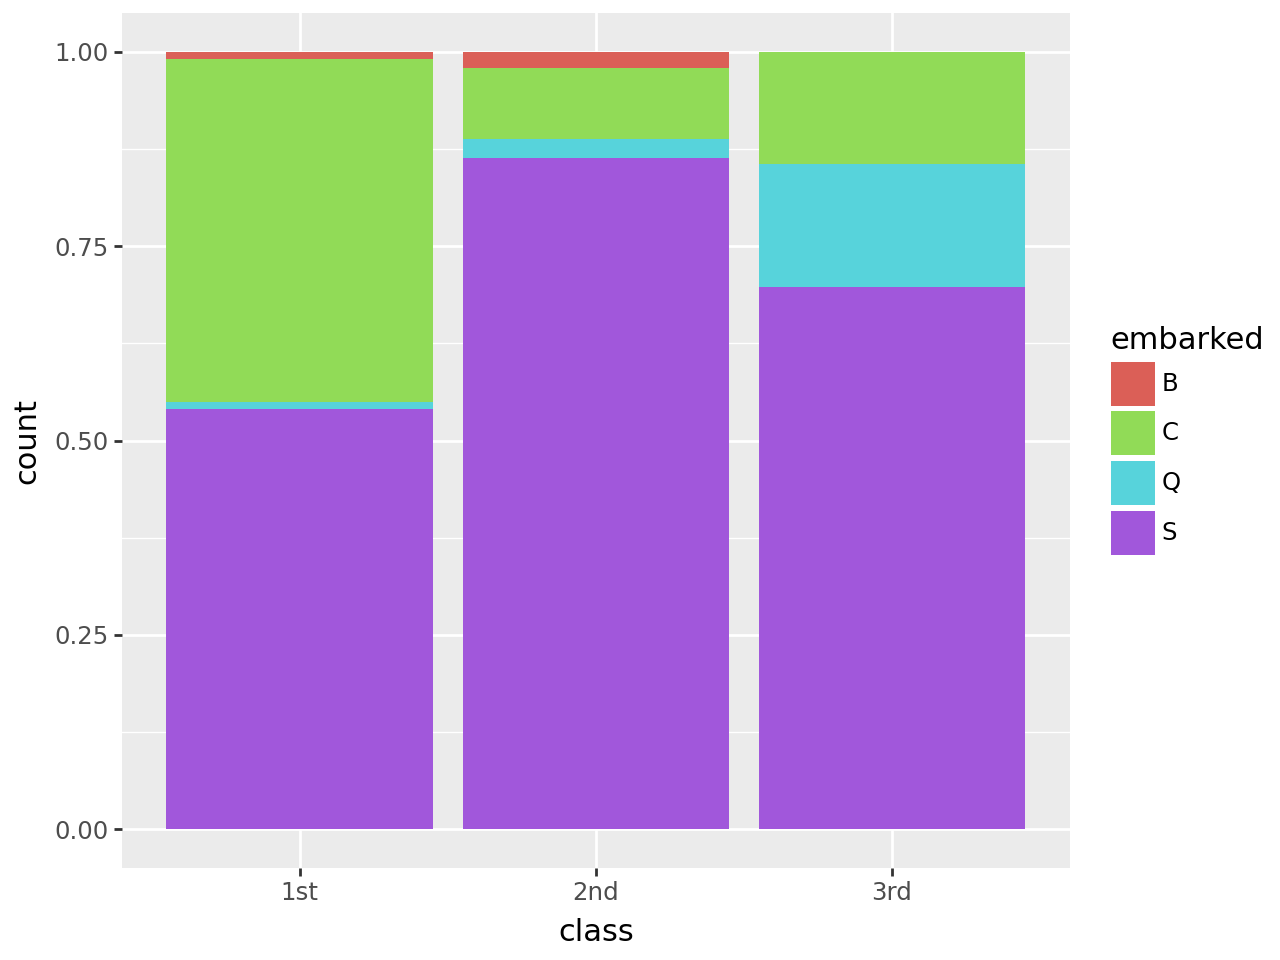

In [ ]:
(
    ggplot(df_passengers)
    + aes(x="class", fill="embarked")
    + geom_bar(position = "fill")
)

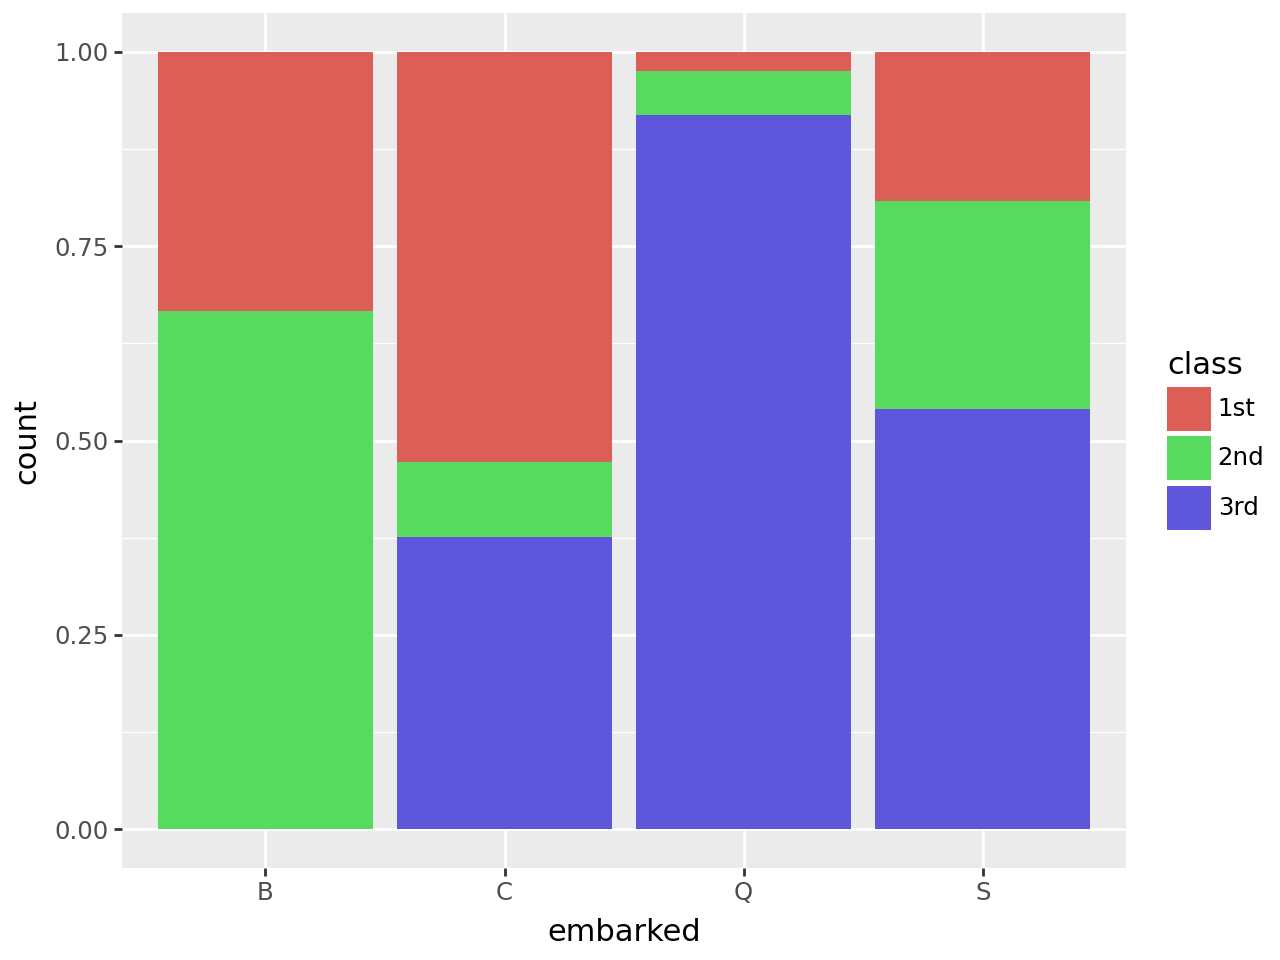

In [ ]:
(
    ggplot(df_passengers)
    + aes(x="embarked", fill="class")
    + geom_bar(position = "fill")
)

Comparing the plots vs the table of conditional probabilities, we can see that the pros of the plots are that it is much easier to visualize which groups are"dominant" given another group. For example, in the second plot, we can see that for those who embarked from B, there is no blue in the bar, meaning that none of the people who embarked from here were 3rd class. On the other hand, the con of this is that we cannot see the exact values for each bar and subsection, whereas when we use a table we are given all of the values. Using a visualization makes the overall patterns easier to see, but the tables allow us to be more precise with the values.

In [ ]:
#%%shell
#jupyter nbconvert --to html /content/Lab_1.ipynb